## DIMENSIONALITY REDUCTION WITH PRINCIPAL COMPONENT ANALYSIS

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler

sns.set_style('darkgrid')
sns.set_palette('husl')

In [3]:
data = pd.read_csv(r'C:\Users\hp\Desktop\New folder\Python Data Class\Data Science -- Machine Learning\data\cleaned_marketing.csv')

In [4]:
data.head(4)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2240 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [6]:
data = data.astype({'ID':'object'})
# data['Dt_Customer'] = data['Dt_Customer'].apply(pd.to_datetime)

data['age'] = [2024 - x for x in data['Year_Birth']]
data.drop(columns=['Year_Birth'], inplace=True)

In [7]:
data['Marital_Status'] = ['single' if x in ['Single', 'Alone','Absurd', 'YOLO']
                          else x for x in data['Marital_Status']]

In [8]:
data.isna().sum()

ID                     0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
age                    0
dtype: int64

In [9]:
# label encode the categorical variables

encoder = LabelEncoder()
cat_cols = ['Education', 'Marital_Status']

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [10]:
data.head(4)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,age
0,5524,2,4,58138,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,67
1,2174,2,4,46344,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,70
2,4141,2,2,71613,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,59
3,6182,2,2,26646,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,40


In [11]:
data.drop(['ID','Dt_Customer'], axis =1, inplace= True)

In [14]:
data = data.astype({'Income':'int'})

In [13]:
data = data[data['Income'] != ' ']

In [15]:
data.reset_index(drop=True, inplace=True)

<Axes: >

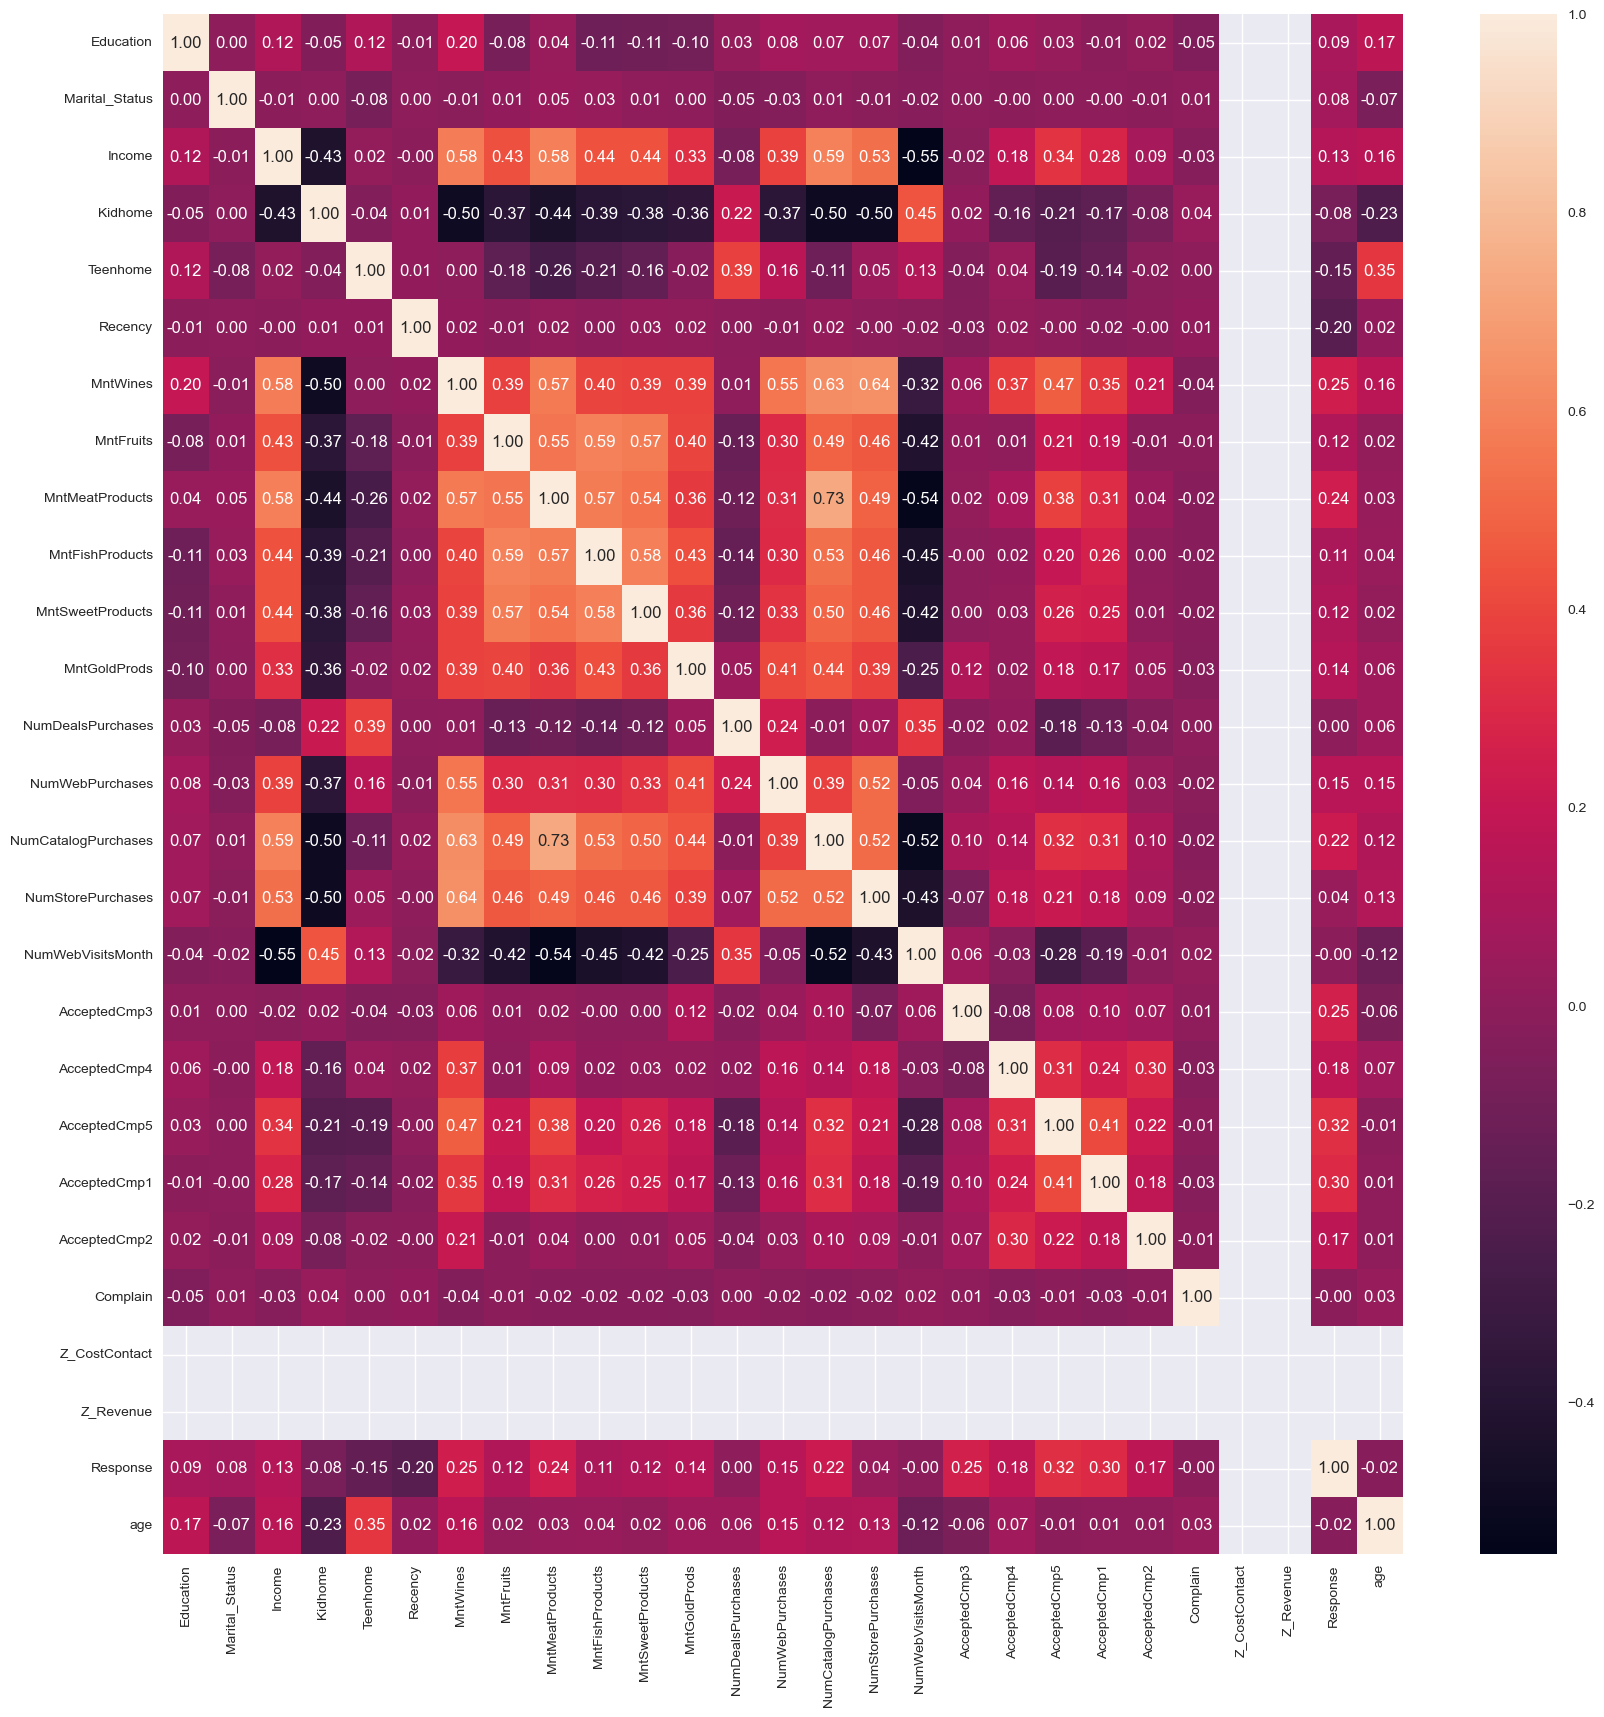

In [16]:
corr = data.corr(method='pearson')

fig = plt.figure(figsize= (20,20))
sns.heatmap(data = corr, fmt= '0.02f', annot=True)

In [17]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data)

scaled_df = pd.DataFrame(data=scaled_data, columns= data.columns)

In [18]:
#### FEATURE REDUCTION 

In [19]:
pca = PCA(n_components= 3)

pca.fit(scaled_df)

pca_data = pca.transform(scaled_df)

pca_df = pd.DataFrame(data = pca_data, columns= ['column_1', 'column_2','column_3'])

In [20]:
pca_df.head(6)

,column_1,column_2,column_3
0,3.771529,-0.504045,-0.342933
1,-2.377784,-0.003400,-0.169018
2,1.610725,-0.158255,-1.084491
3,-2.527710,-1.453641,0.209223
4,-0.439751,0.100109,-0.500486
5,0.696887,1.346563,-0.554684


Text(0.5, 0.98, 'SCATTER CHART OF REDUCED DIMENSIONS')

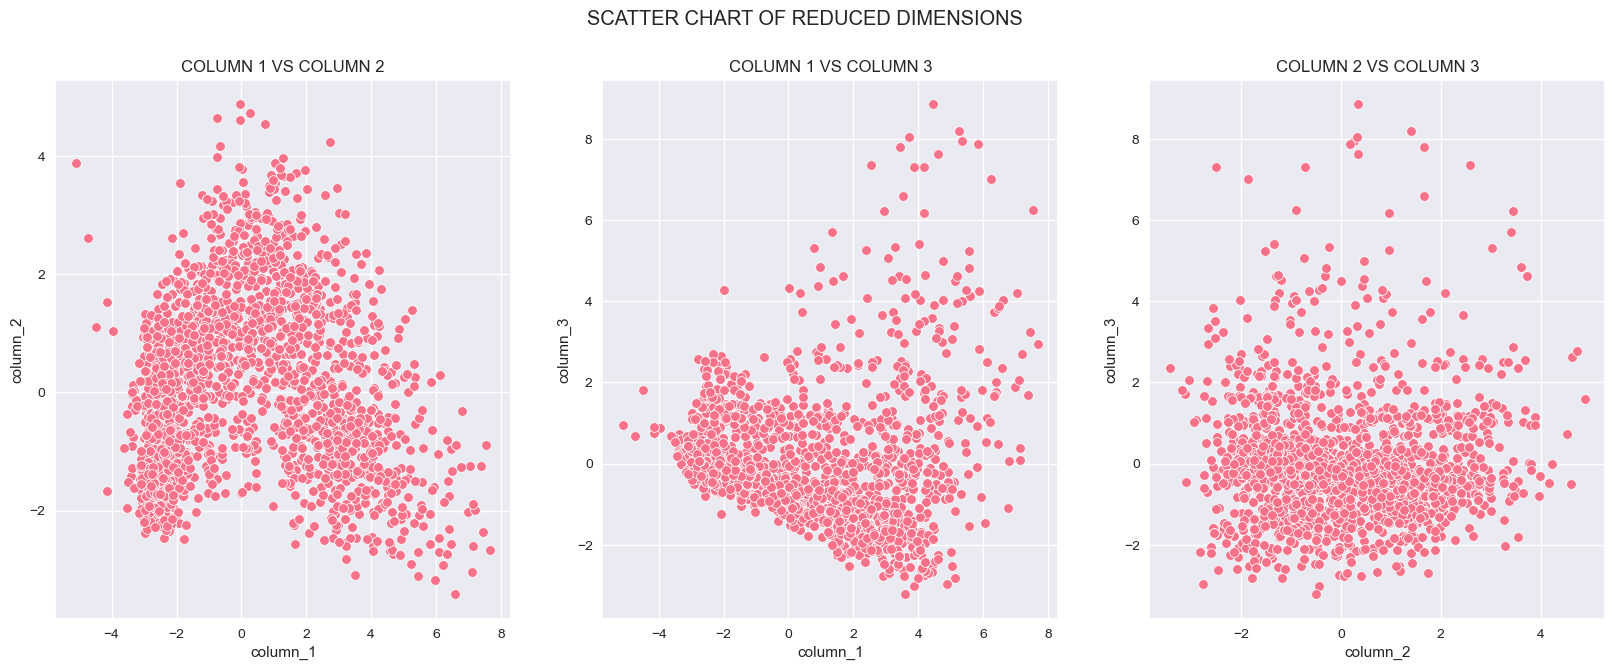

In [21]:
# plotting scatter chart of column relationship

fig, axes = plt.subplots(1,3, figsize = (20,7))

sns.scatterplot(data= pca_df, x = 'column_1', y = 'column_2', ax = axes[0])
sns.scatterplot(data= pca_df, x = 'column_1', y = 'column_3', ax = axes[1])
sns.scatterplot(data= pca_df, x = 'column_2', y = 'column_3', ax = axes[2])

axes[0].set_title('COLUMN 1 VS COLUMN 2')
axes[1].set_title('COLUMN 1 VS COLUMN 3')
axes[2].set_title('COLUMN 2 VS COLUMN 3')

plt.suptitle('SCATTER CHART OF REDUCED DIMENSIONS')


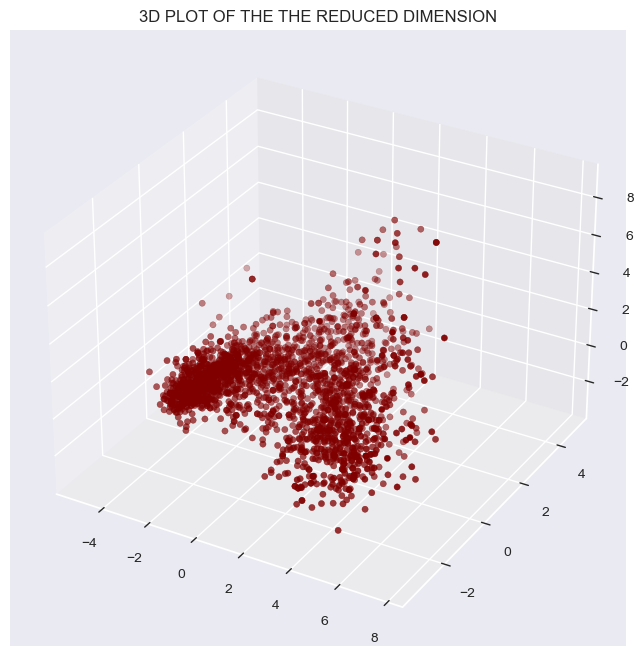

In [22]:
# 3d plot of the reduced dimension

x = pca_df['column_1']
y = pca_df['column_2']
z = pca_df['column_3']

fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(111, projection= '3d')

ax.scatter(x,y,z, c = 'maroon', marker= 'o')

ax.set_title('3D PLOT OF THE THE REDUCED DIMENSION')

plt.show()

In [23]:
fig = px.scatter_3d(data_frame=pca_df, x='column_1', y='column_2', z='column_3',
                    title = '3D CHART OF THE REDUCED DIMENSION')
fig.show()

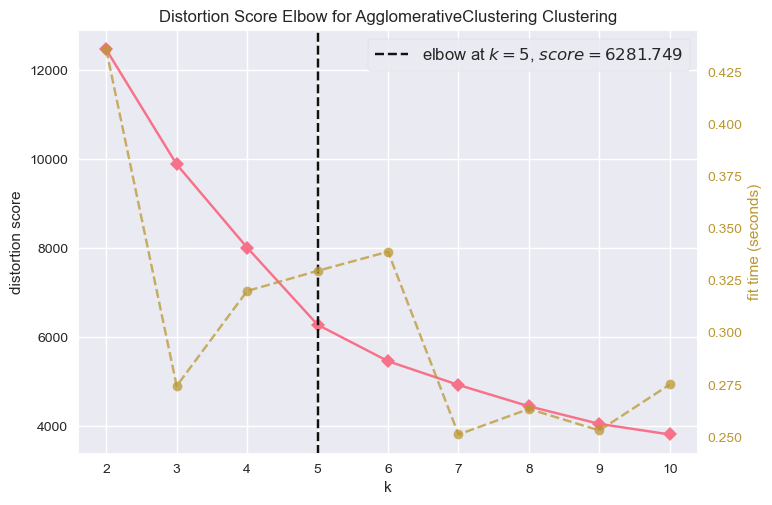

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
model_viz = KElbowVisualizer(estimator=AgglomerativeClustering(), metric= 'distortion', k = 10)
model_viz.fit(pca_df)
model_viz.show()

In [25]:
model = AgglomerativeClustering(n_clusters= 4)

preds = model.fit_predict(pca_df)

pca_df['clusters'] = preds

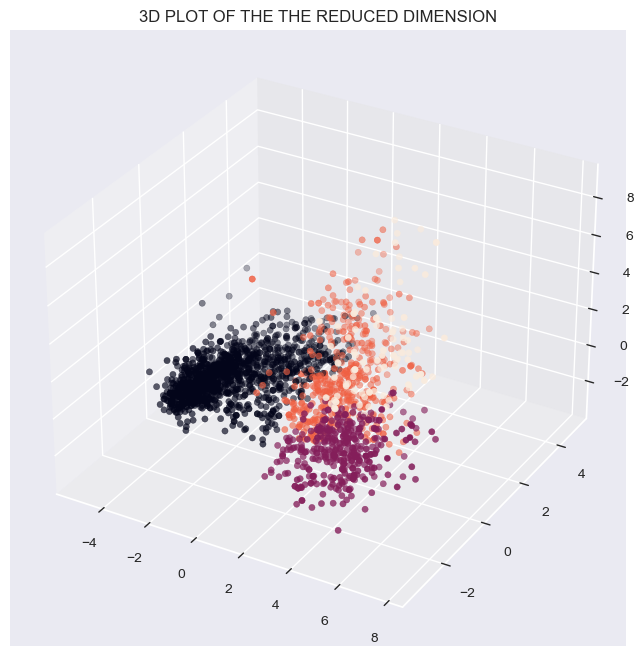

In [26]:
x = pca_df['column_1']
y = pca_df['column_2']
z = pca_df['column_3']

fig = plt.figure(figsize = (10, 8))

ax = fig.add_subplot(111, projection= '3d')

ax.scatter(x,y,z, c = preds, marker= 'o')

ax.set_title('3D PLOT OF THE THE REDUCED DIMENSION')

plt.show()

In [27]:
fig = px.scatter_3d(data_frame=pca_df, x='column_1', y='column_2', z='column_3',
                    title = '3D CHART OF THE REDUCED DIMENSION', color='clusters')
fig.show()

#### MODEL EVALUATION AND INTERPRETATION

In [28]:
data['clusters'] = ['cluster_1' if x == 0 else 'cluster_2' if x == 1
                    else 'cluster_3' if x == 2 else 'cluster_4' for x in preds]


In [29]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age',
       'clusters'],
      dtype='object')

In [30]:
data['spent'] =  data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [31]:
px.scatter(data_frame=data, y = 'Income', x = 'spent', color= 'clusters')

In [48]:
def get_criteria(col1, col2, norm = 100):
       df1 = data[['clusters',col1]].groupby(['clusters']).median()
       df1.reset_index(inplace= True)
       df2 = data[['clusters',col2]].groupby(['clusters']).median()
       df2.reset_index(inplace= True)

       income_spent = pd.merge(df1,df2, on='clusters', how = 'inner')
       if col1 == 'Income' or col2 == 'Income':
              income_spent[col1] = [x/norm for x in income_spent[col1]]
       chart = px.bar(data_frame=income_spent, x = 'clusters', y = [col1,col2],
              barmode='group',
              title = f"{col1.upper()} AND {col2.upper()} BY EACH CLUSTER ADJUSTED BY {str(norm)}")
       
       return chart

get_criteria(col1='Income', col2 = 'spent')

In [49]:
data['deals'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumWebVisitsMonth']
get_criteria(col1='Income', col2 = 'deals', norm=1000)

### Clustering Criteria
1. cluster 4, and cluster 2 are high income individuals with corresponding high earnings while cluster 3 and 1 spends prudently compared to their earnings.
2. cluster 2 and 4 are high income with no children
3. clusters without children are generally high spenders
4. cluster 3 and 1 are deal hunters.Heavy spenders are not interested in deals
6. cluster 1 and 3 complains the most and the highest spenders rarely have complaints
7.

In [35]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age', 'clusters',
       'spent'],
      dtype='object')

In [50]:
get_criteria(col1='age', col2 = 'deals')

In [52]:
get_criteria(col1='age', col2 = 'spent')

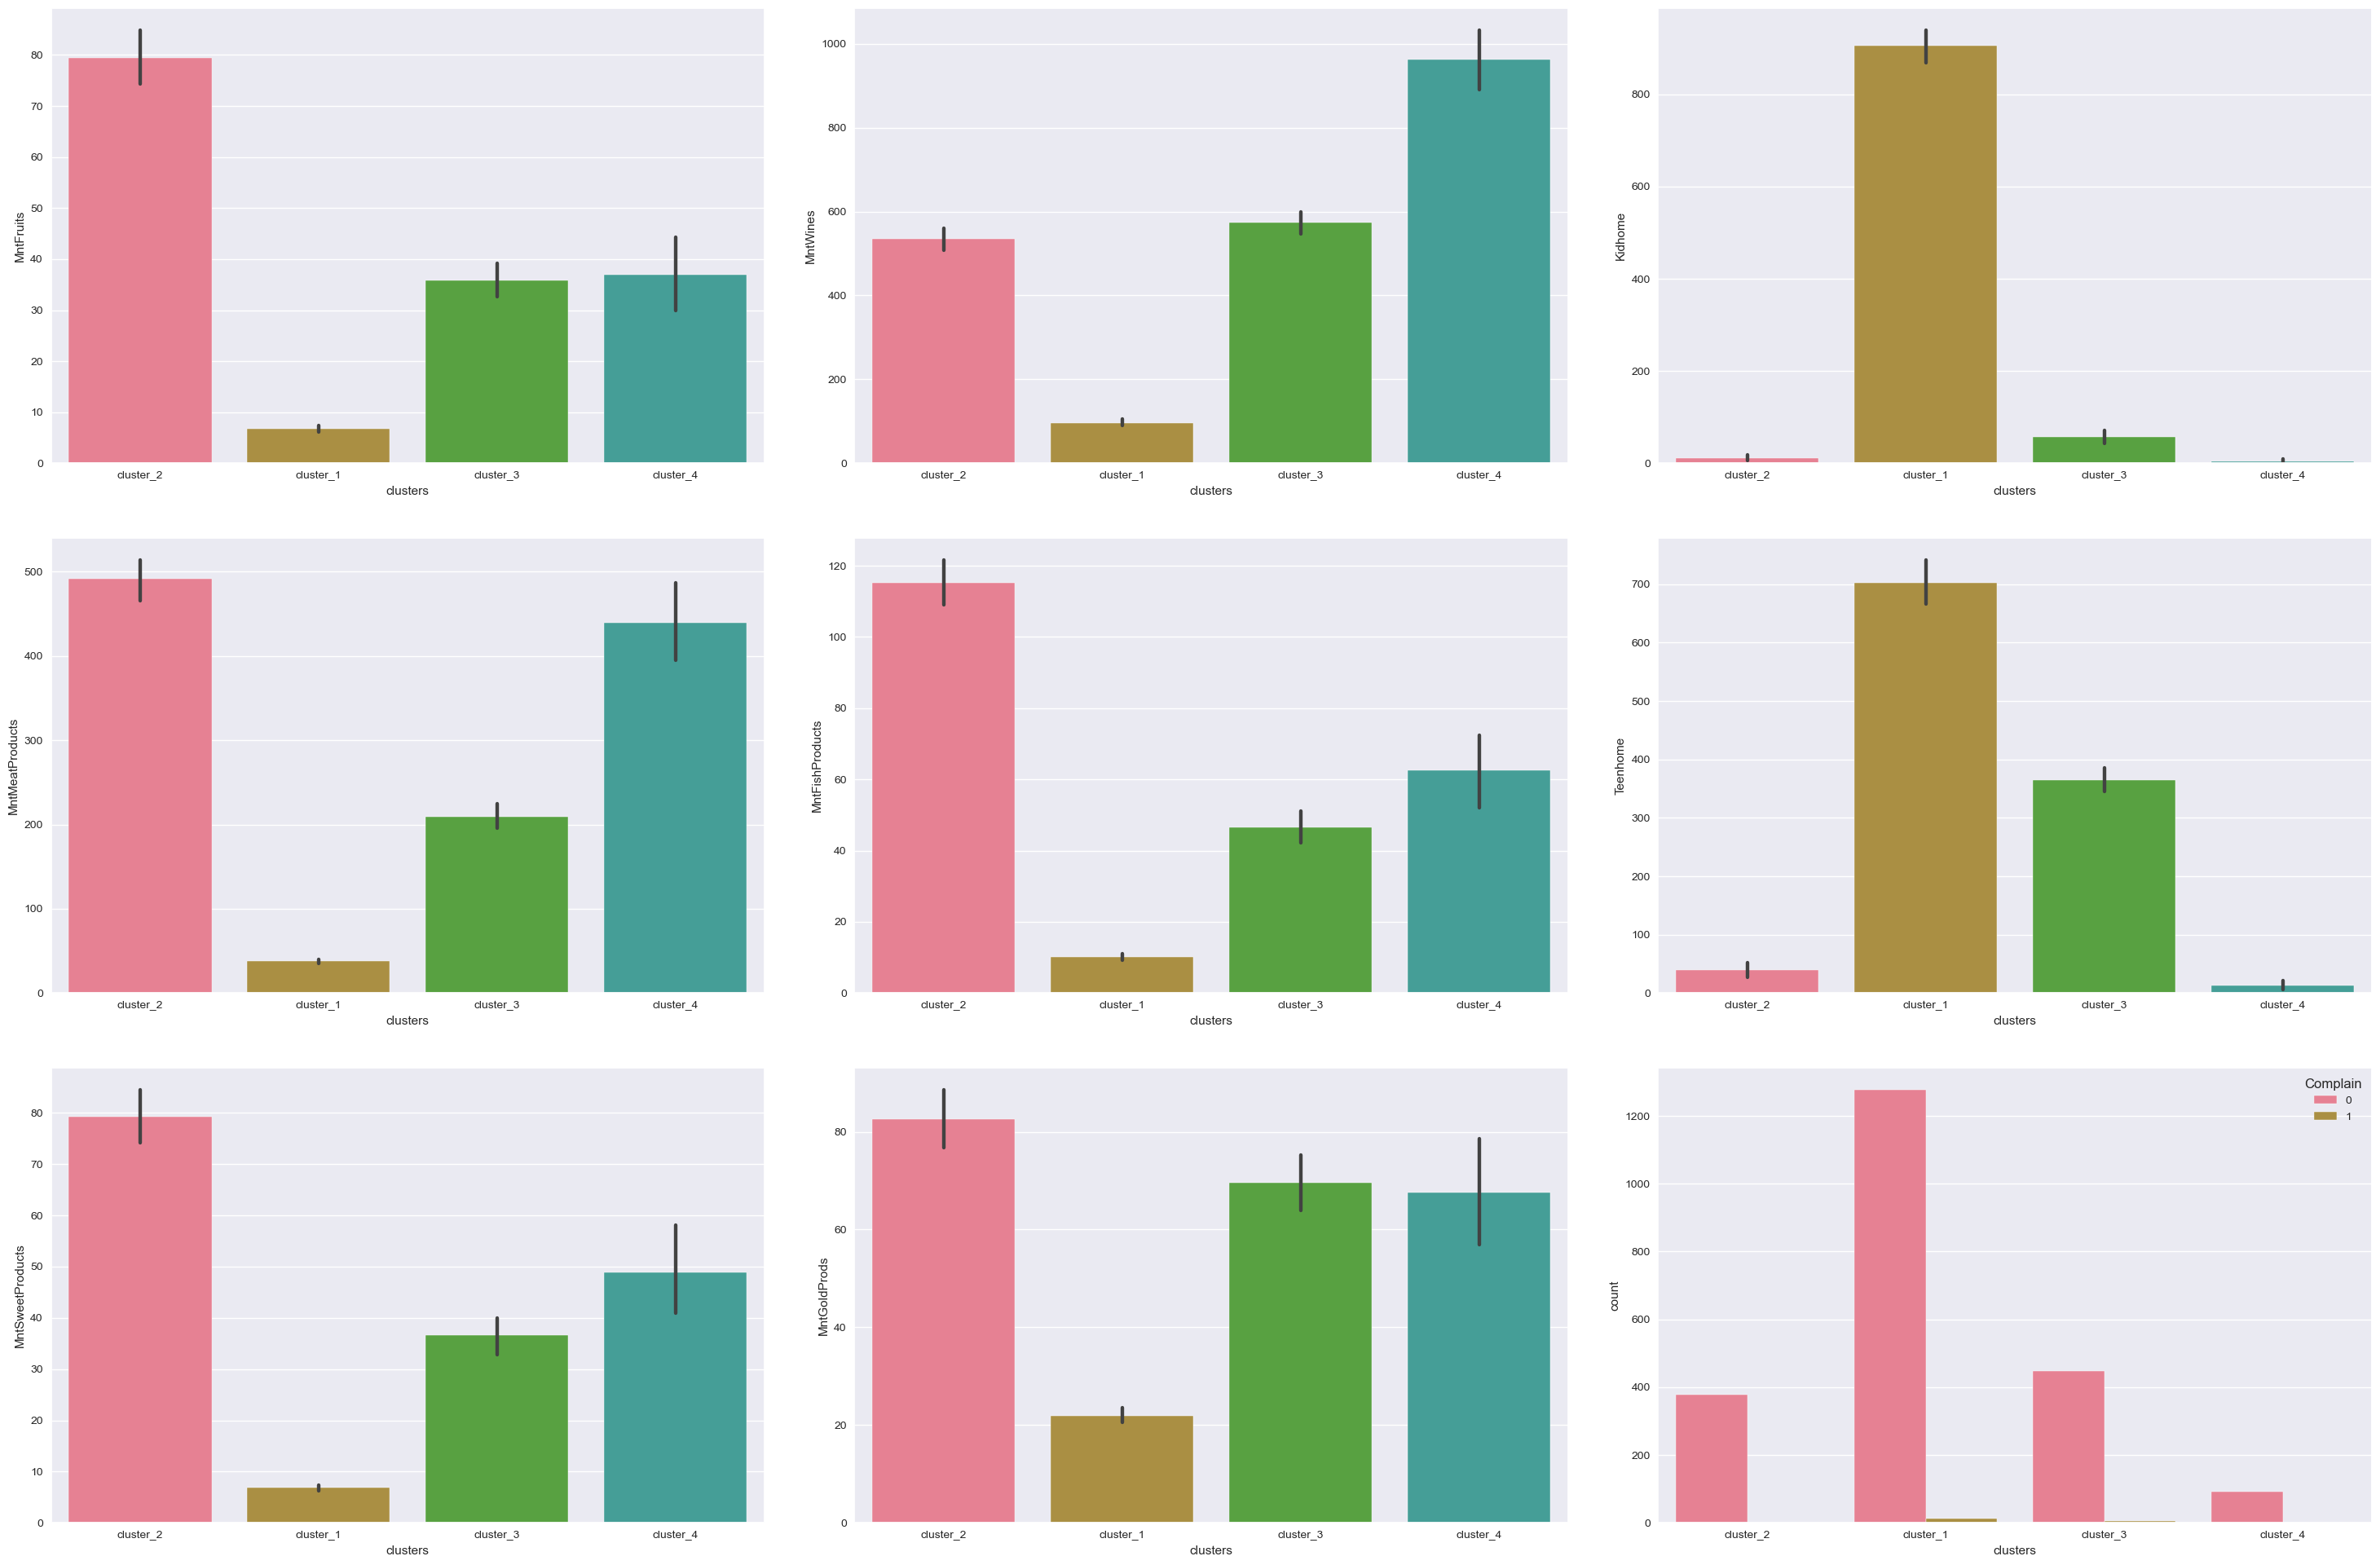

In [65]:
fig, axes = plt.subplots(3,3, figsize = (30,20))
sns.barplot(data = data,x = 'clusters', y = 'MntFruits', estimator='mean', ax = axes[0,0])
sns.barplot(data = data,x = 'clusters', y = 'MntWines', estimator='mean', ax = axes[0,1])
sns.barplot(data = data,x = 'clusters', y = 'MntMeatProducts', estimator='mean', ax = axes[1,0])
sns.barplot(data = data,x = 'clusters', y = 'MntFishProducts', estimator='mean', ax = axes[1,1])
sns.barplot(data = data,x = 'clusters', y = 'MntSweetProducts', estimator='mean', ax = axes[2,0])
sns.barplot(data = data,x = 'clusters', y = 'MntGoldProds', estimator='mean', ax = axes[2,1])
sns.barplot(data = data,x = 'clusters', y = 'Kidhome', estimator='sum', ax = axes[0,2])
sns.barplot(data = data,x = 'clusters', y = 'Teenhome', estimator='sum', ax = axes[1,2])
sns.countplot(data = data,x = 'clusters',hue= 'Complain', ax = axes[2,2])

fig.tight_layout(pad= 3)



In [56]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'age', 'clusters',
       'spent', 'deals'],
      dtype='object')

<Axes: xlabel='clusters', ylabel='count'>

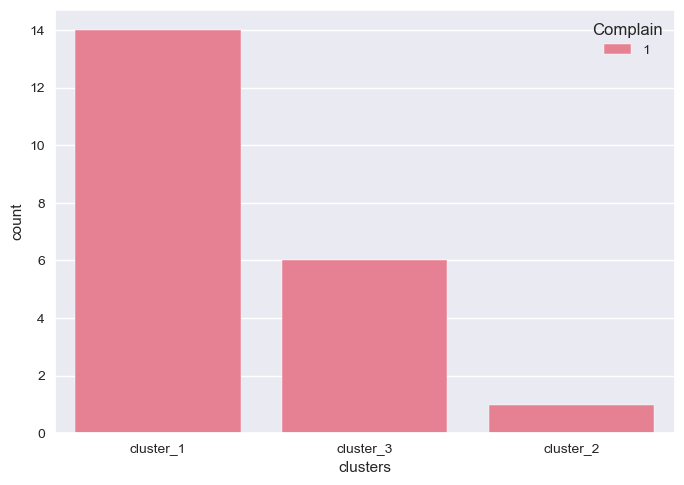

In [66]:
sns.countplot(data = data[data['Complain'] ==1 ],x = 'clusters',hue= 'Complain')